In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_excel('housing data.xlsx')
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO   Btown  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Btown,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  Btown    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
#to get to know that any how many we have 0 and 1
data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'Btown'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

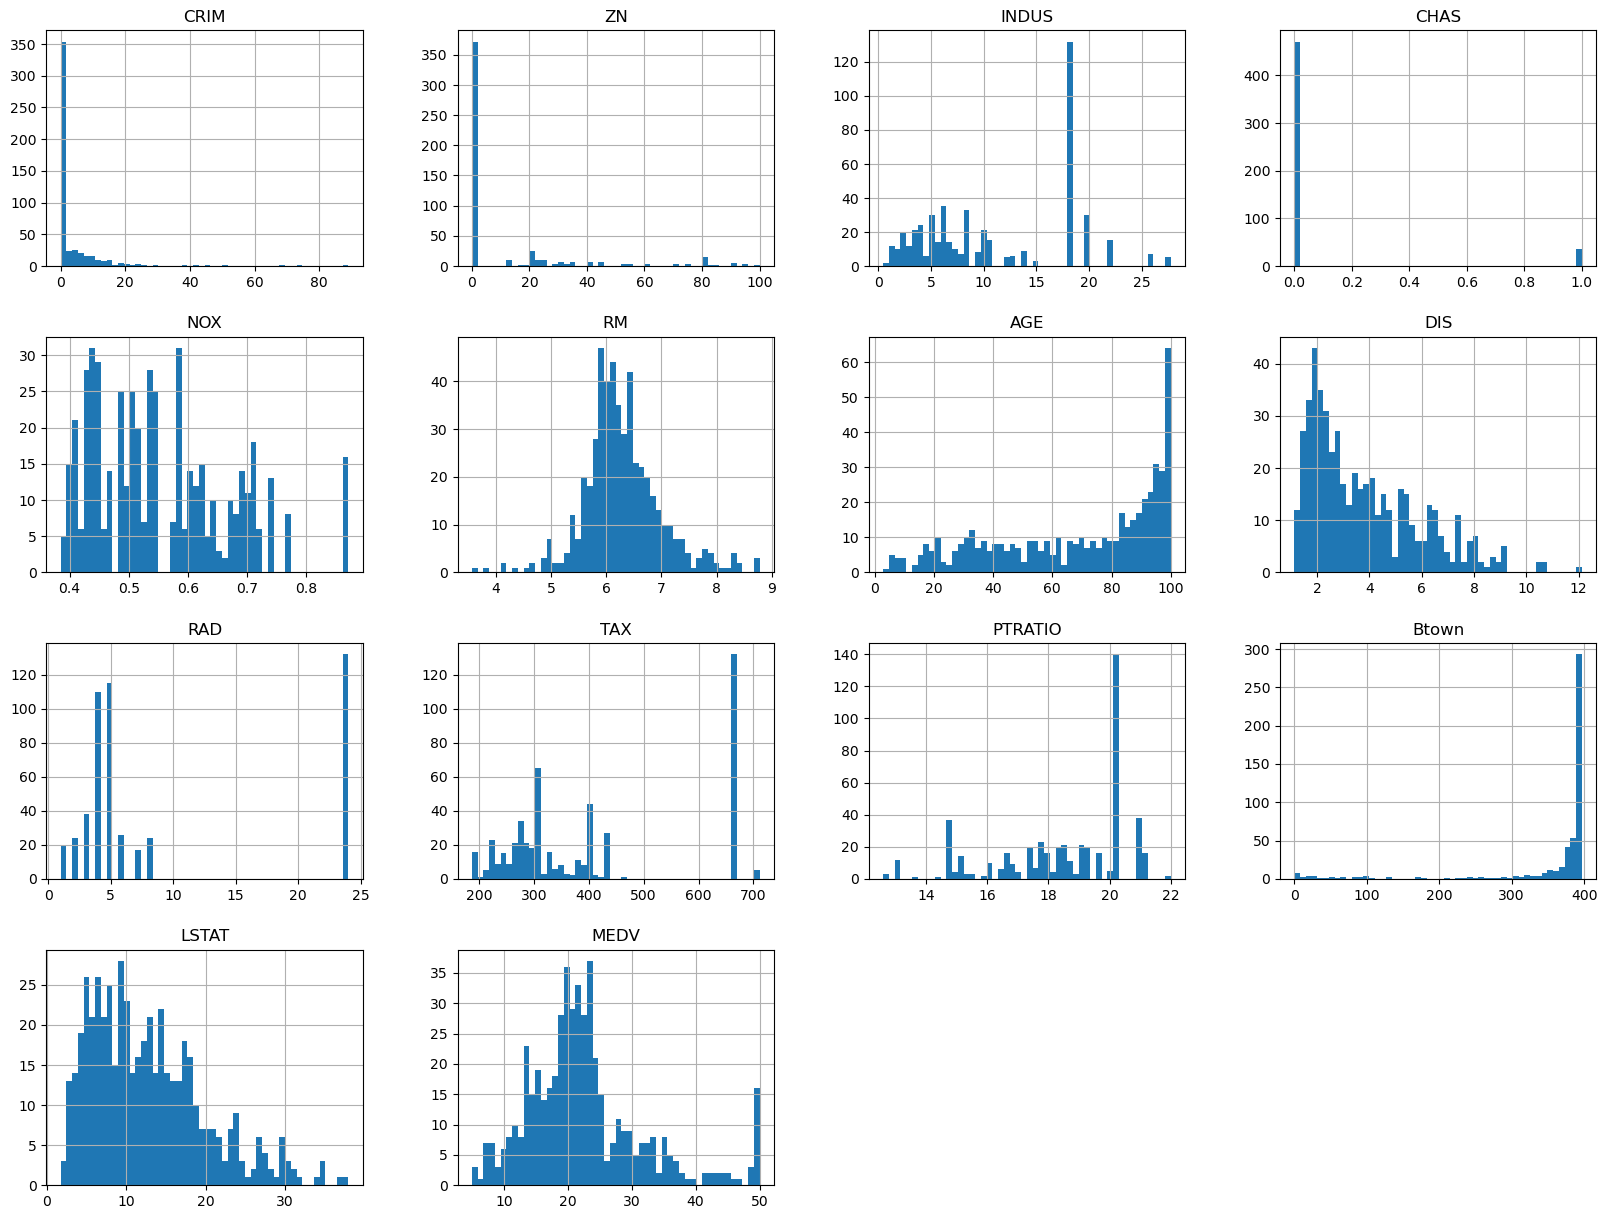

In [6]:
#for ploting histgram
data.hist(bins=50,figsize=(20,15))

<AxesSubplot: >

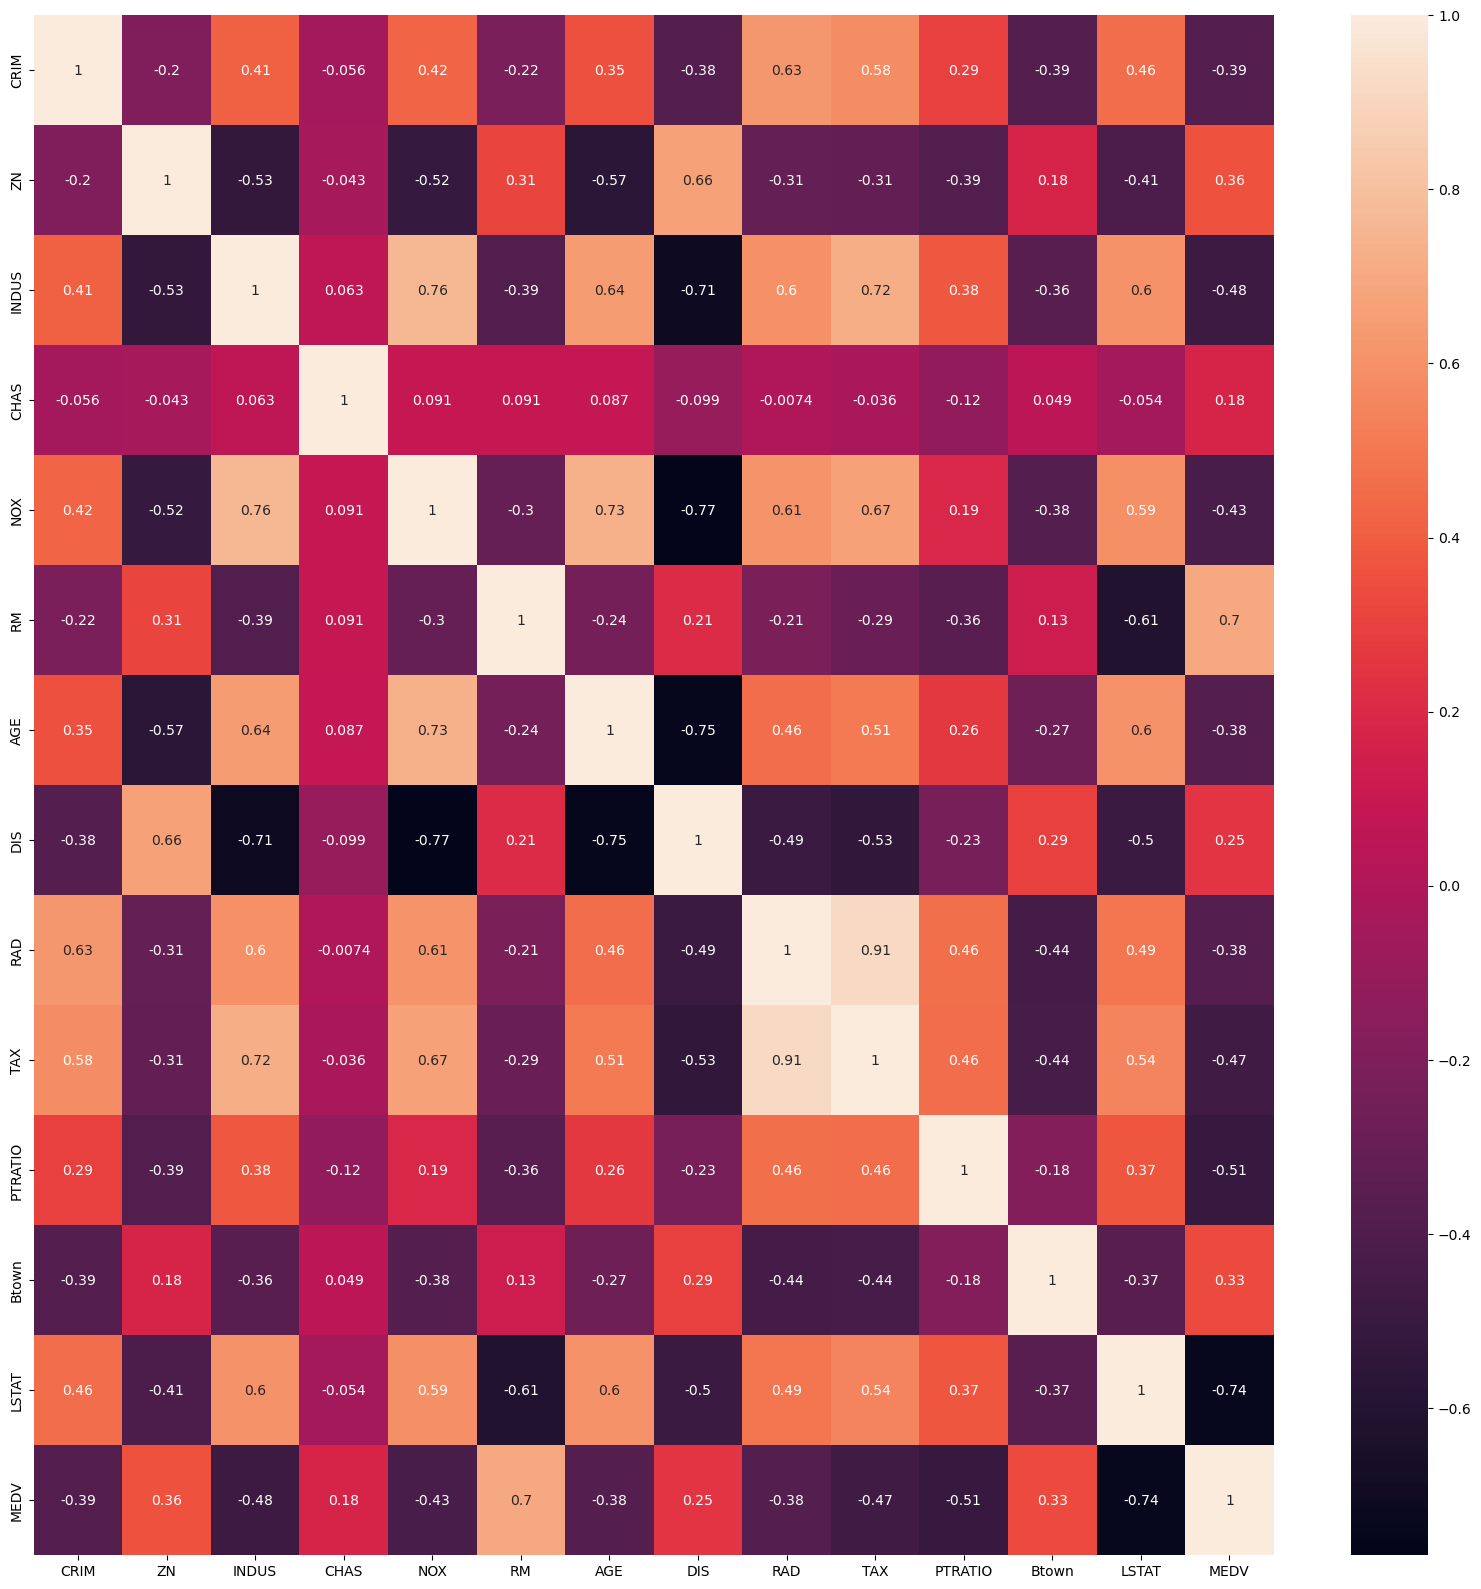

In [7]:
correlation=data.corr()
fig=plt.figure(figsize=(20,20))
axis=fig.add_subplot(111)
sns.heatmap(correlation,annot=True)

## Correlations

In [8]:
#correlation between elements
corre_matrix=data.corr()
corre_matrix['MEDV'].sort_values()
print(corre_matrix['MEDV'].sort_values(ascending=False))

MEDV       1.000000
RM         0.695360
ZN         0.360445
Btown      0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


## Analysis with more correlated elements

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='INDUS', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='INDUS', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='INDUS', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='INDUS'>,
        <AxesSubplot: xlabel='RM', ylabel='INDUS'>,
        <AxesSubplot: xlabel='ZN', ylabel='INDUS'>,
        <AxesSubplot: xlabel='INDUS', ylabel='INDUS'>]], dtype=object)

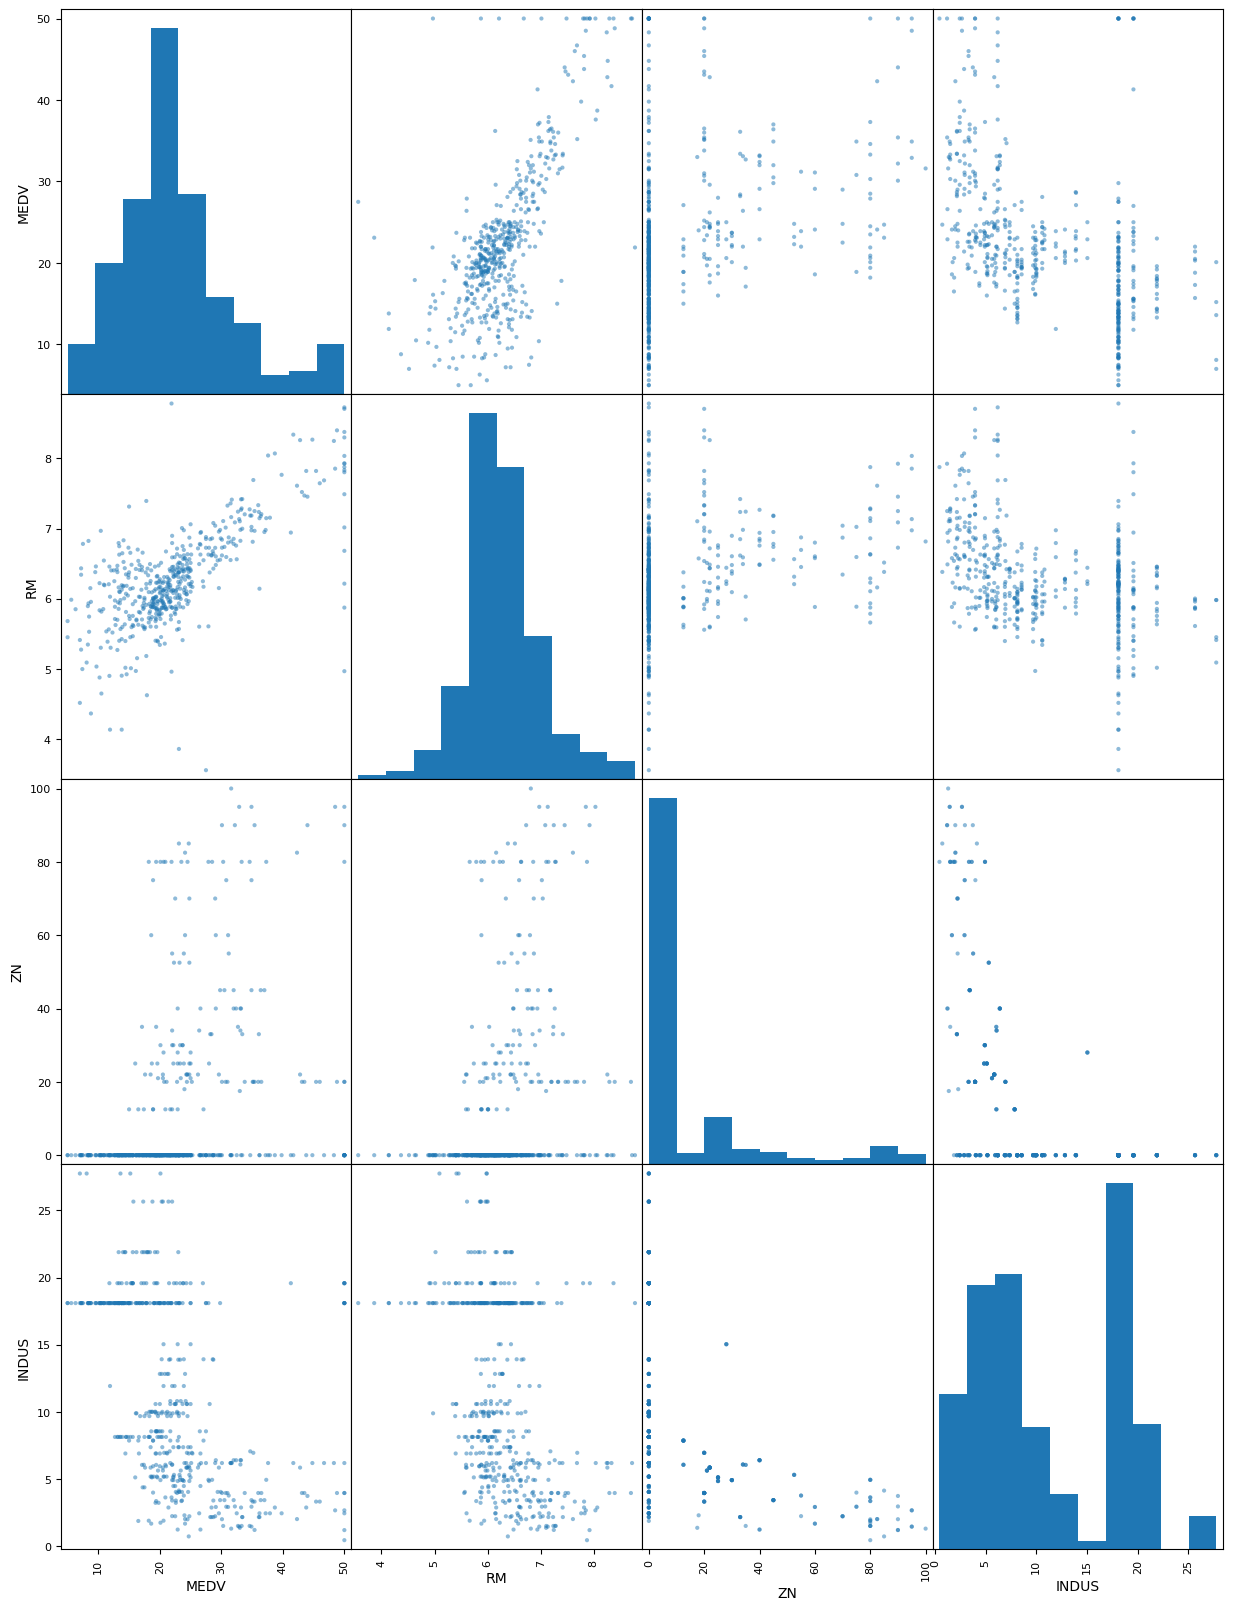

In [9]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","INDUS"]
scatter_matrix(data[attributes],figsize=(15,20))

In [10]:
# Realation between average number of rooms per dwelling and prize of house

C:\Users\aakas\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='RM', ylabel='MEDV'>

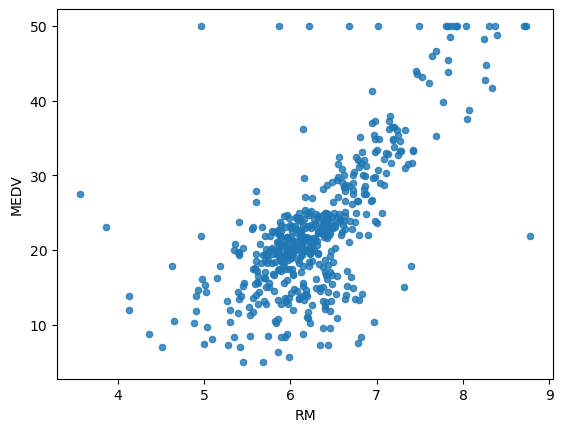

In [11]:
data.plot(kind="scatter",x='RM',y="MEDV",alpha=0.8)

# Relation between % lower status of the population and prize of house

<AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>

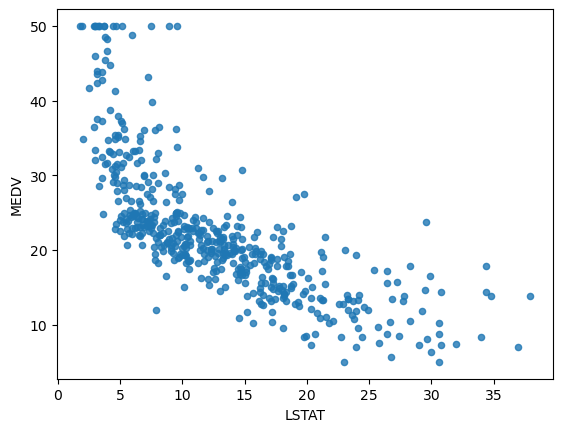

In [12]:
data.plot(kind="scatter",x='LSTAT',y="MEDV",alpha=0.8)

# Relation between pupil-teacher ratio by town and prize of house

<AxesSubplot: xlabel='PTRATIO', ylabel='MEDV'>

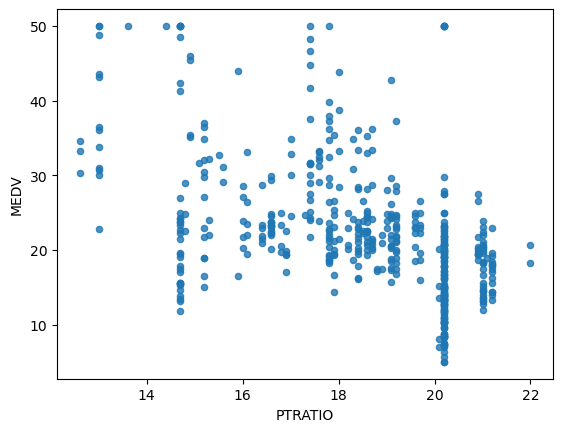

In [13]:
data.plot(kind="scatter",x='PTRATIO',y="MEDV",alpha=0.8)

## data spliting in test data and train data

# Splitting data in such a manner that element CHAS will equally distributed in test data and train data

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42)

for train_index,test_index in split.split(data,data['CHAS']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

# data for train the model

In [15]:
housing_train=strat_train_set.copy()
housing_train.drop('MEDV',axis=1,inplace=True)
housing_label_train=strat_train_set['MEDV']

#housing_train_LR=housing_train.copy()
housing_train_RFR=housing_train.copy()
#housing_train_DTR=housing_train.copy()

#housing_label_train_LR = housing_label_train.copy()
housing_label_train_RFR = housing_label_train.copy()
#housing_label_train_DTR = housing_label_train.copy()
#print(housing_train)
#print(housing_label_train)

# data for the test the model

In [16]:
housing_test=strat_test_set.copy()
housing_test.drop('MEDV',axis=1,inplace=True)
housing_label_test=strat_test_set['MEDV']

#housing_test_LR=housing_test.copy()
housing_test_RFR=housing_test.copy()
#housing_test_DTR=housing_test.copy()

#housing_label_test_LR = housing_label_test.copy()
housing_label_test_RFR = housing_label_test.copy()
#housing_label_test_DTR = housing_label_test.copy()

#print(housing_test)
#print(housing_label_test)

# Applying the suitable model

In [17]:
model_RFR=RandomForestRegressor() 
#model_LR=LinearRegression()
#model_DTR=DecisionTreeRegressor()
model_RFR.fit(housing_train_RFR,housing_label_train_RFR) 
#model_LR.fit(housing_train_LR,housing_label_train_LR) 
#model_DTR.fit(housing_train_DTR,housing_label_train_DTR) 

RandomForestRegressor()

# Using more appropriate method to get accuracy of model

In [18]:
from sklearn.model_selection import cross_val_score
scores_RFR = cross_val_score(model_RFR,housing_train_RFR,housing_label_train_RFR,scoring="neg_mean_squared_error",cv=10)
#scores_LR = cross_val_score(model_RFR,housing_train_RFR,housing_label_train_RFR,scoring="neg_mean_squared_error",cv=10)
#scores_DTR = cross_val_score(model_RFR,housing_train_RFR,housing_label_train_RFR,scoring="neg_mean_squared_error",cv=10)
rmse_scores_RFR=np.sqrt(-scores_RFR)
#rmse_scores_LR=np.sqrt(-scores_LR)
#rmse_scores_DTR=np.sqrt(-scores_DTR)
#print(rmse_scores) 

In [19]:
def print_score(scores):
    scores=scores
    print("score : ",scores)
    scores_mean=scores.mean()
    print("mean :", scores.mean())
    scores_std=scores.std()
    print("Standard deviation :",scores.std())
    return(scores_mean,scores_std)

In [20]:
print("Result with Random forest regressor")
mean_RFR,std_RFR=print_score(rmse_scores_RFR)
#print("Result with Linear regressor")
#mean_LR,std_LR=print_score(rmse_scores_LR)
#print("Result with Dicision tree regressor")
#mean_DTR,std_DTR=print_score(rmse_scores_DTR)

Result with Random forest regressor
score :  [2.8893281  2.84699332 4.39662721 2.5318012  3.55738427 2.60794349
 4.67764129 3.27836245 2.98865601 3.15029414]
mean : 3.292503147009742
Standard deviation : 0.6876717655348893


In [21]:
model = model_RFR

## Deploy the model

In [22]:
from joblib import dump,load
dump(model,"House prize prediction.joblib")

['House prize prediction.joblib']

## Final testing of model

In [23]:
final_predictions=model.predict(housing_test_RFR)
final_mse = mean_squared_error(housing_label_test_RFR,final_predictions)
final_rmse=np.sqrt(final_mse)

In [24]:
print_score(final_rmse)

score :  3.0208234642164666
mean : 3.0208234642164666
Standard deviation : 0.0


(3.0208234642164666, 0.0)